In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [0]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [0]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [0]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


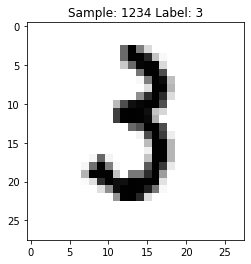

In [16]:
import matplotlib.pyplot as plt

def display_sample(num):
  print(train_labels[num])
  label = train_labels[num].argmax(axis=0)
  image = train_images[num].reshape([28, 28])
  plt.title('Sample: %d Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

display_sample(1234)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [24]:
history = model.fit(train_images, train_labels,
                    batch_size = 100,
                    epochs = 10,
                    verbose = 2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.0079 - acc: 0.9980 - val_loss: 0.0771 - val_acc: 0.9810
Epoch 2/10
 - 5s - loss: 0.0067 - acc: 0.9979 - val_loss: 0.0832 - val_acc: 0.9808
Epoch 3/10
 - 5s - loss: 0.0052 - acc: 0.9984 - val_loss: 0.0811 - val_acc: 0.9819
Epoch 4/10
 - 5s - loss: 0.0043 - acc: 0.9986 - val_loss: 0.0879 - val_acc: 0.9809
Epoch 5/10
 - 5s - loss: 0.0033 - acc: 0.9992 - val_loss: 0.0825 - val_acc: 0.9832
Epoch 6/10
 - 5s - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0824 - val_acc: 0.9833
Epoch 7/10
 - 5s - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0905 - val_acc: 0.9825
Epoch 8/10
 - 5s - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0886 - val_acc: 0.9816
Epoch 9/10
 - 5s - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0879 - val_acc: 0.9827
Epoch 10/10
 - 5s - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0933 - val_acc: 0.9822


In [25]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09329722556645816
Test accuracy: 0.9822
